## Group Assignment - Predict survival on Titanic

**Instructions**

The task is to predict survival on board of the Titanic:

https://www.kaggle.com/c/titanic/

 
The key column is the Age, which has some missing values, so you will need some imputation strategy.

 

**Scoring for this assignment goes as follows:**

1 point for the preliminary data analysis (proper data reading, basic statistics, visualization)

2 points for feature engineering (imputation of missing values in the Age column, creation of new features)

1 point for the machine learning process (algorithm selection, final test score)

**Rules:**

Datasets train.csv and test.csv from https://www.kaggle.com/c/titanic/data must be used, no other sources
You cannot use machine learning algorithms for the feature engineering part, only manual techniques. This rules out KNN for imputation, Deep Learning, sklearn.preprocessing.Imputer, fancyimpute, missingno, and similar
The format of the delivery *must*:

- be a Jupyter notebook
- whose name should contain the surnames of the students in the group
- run, top to bottom, without errors on a capable computer with Python 3.6
- If you don't manage to get it working, document what approaches did you try, and explain the errors. Do not deliver an unfinished notebook without explanations.

 

Good luck!



In [36]:
import pandas as pd
import numpy as np

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [231]:
# We begin by importing the data.

train = pd.read_csv('train.csv', index_col= 'PassengerId')

# Next, we check the head, info and describe

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [232]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [233]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


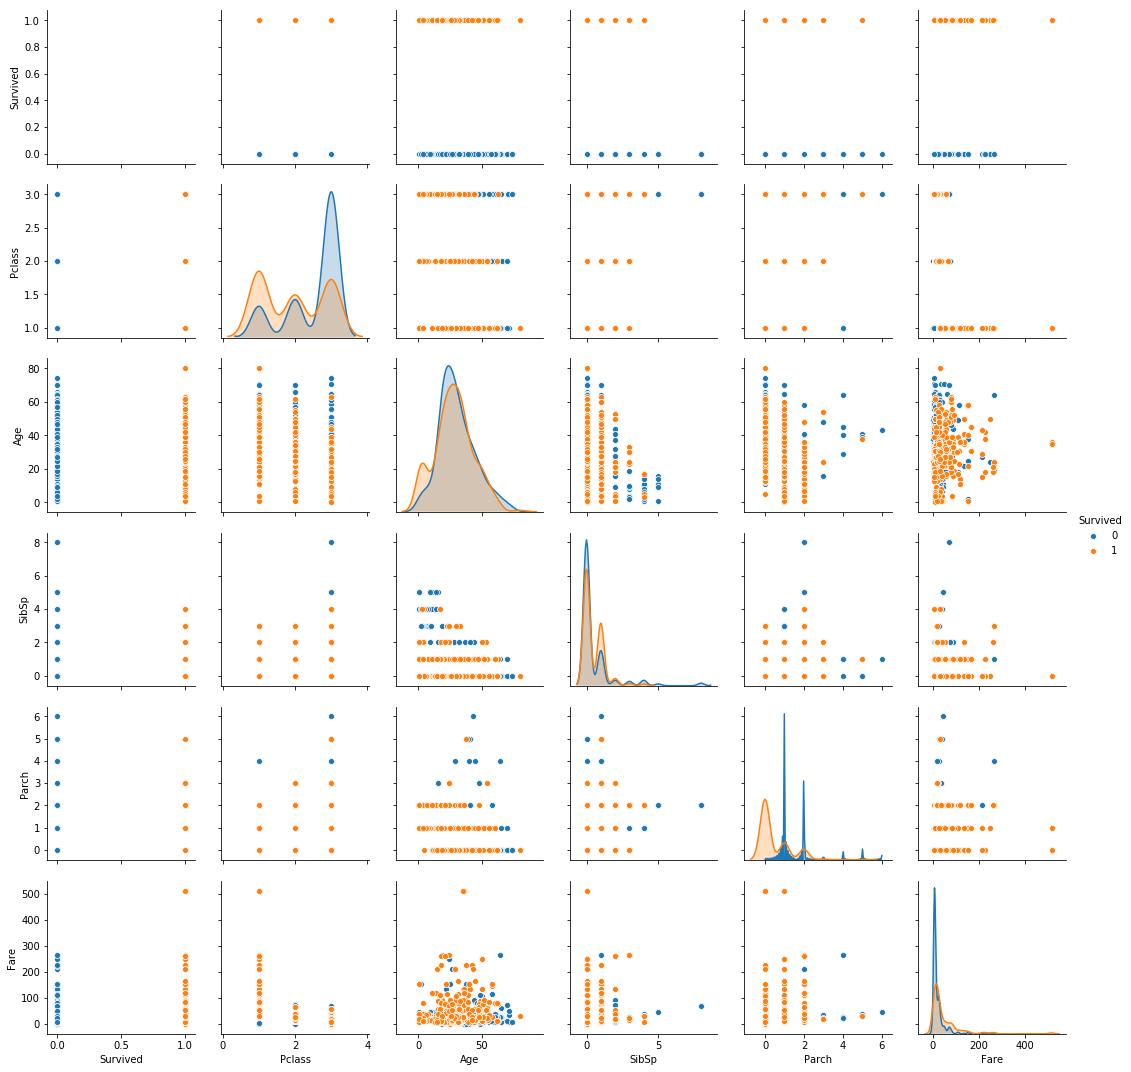

In [234]:
# A preliminary check of the data using a Pairplot plot

import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data = train, hue = 'Survived')

In [235]:
# So, how do our categorical variables look?

#print(train['Cabin'].nunique())
print(train['Embarked'].unique())
print(train['Parch'].unique())
print(train['Pclass'].unique())
print(train['Sex'].unique())
print(train['SibSp'].unique())
print(train['Survived'].unique())
#print(complete['Ticket'].nunique())


['S' 'C' 'Q' nan]
[0 1 2 5 3 4 6]
[3 1 2]
['male' 'female']
[1 0 3 4 2 5 8]
[0 1]


In [236]:
# We are missing values only in the 'embarked' variable. 
# We can see below that there are only two entries missing this data. We will delete these two rows later. 

train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [237]:
# Next, we check for missing data in the rest of the dataframe (ie. the numeric variables) by using .isnull(). 

# The below seaborn heatmap shows that two columns are of concern:
    # 1. Cabin: there is more missing data than complete data for Cabin. We chose to remove this feature altogether.
    # 2. Age : while there is a lot of missing data, there are still enough complete entries to impute the missing  
            # data and us the age feature in our ML algorithm.

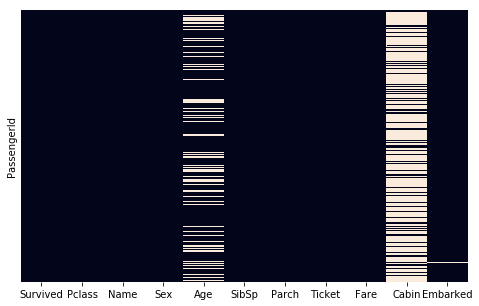

In [238]:
plt.figure(figsize=(8, 5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False);

In [239]:
#Specifically, there are 177 rows missing Age.

len(train[train['Age'].isnull()])

177

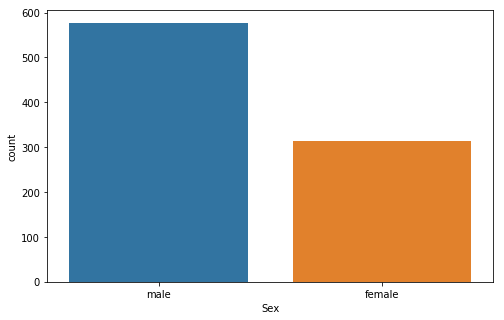

In [240]:
plt.figure(figsize=(8, 5))
sns.countplot(data = train, x = 'Sex');

**Filling the missing data:**

We considered removing the missing rows, but instead we considered imputing based on the values that do exist. 
While filling the missing data with the mean is an option, we can see in the below boxplot that there is a large varuance in age, and a right skew. We instead chose to look at how age varied by Sex and Pclass to see if we could find a more granular and accurate solution.

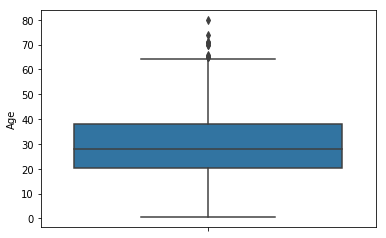

In [241]:
sns.boxplot(data = train, y = 'Age');

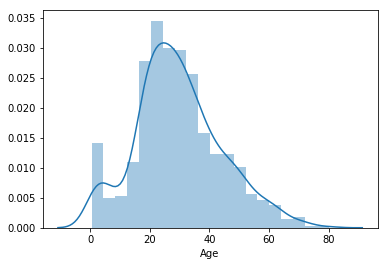

In [242]:
sns.distplot(train['Age'].dropna());

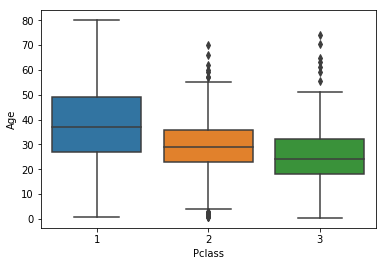

In [243]:
sns.boxplot(data = train, x = 'Pclass', y = 'Age');

In [244]:
print(train[train['Pclass'] == 1].mean()['Age'])
print(train[train['Pclass'] == 2].mean()['Age'])
print(train[train['Pclass'] == 3].mean()['Age'])

38.233440860215055
29.87763005780347
25.14061971830986


In [245]:
# We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 

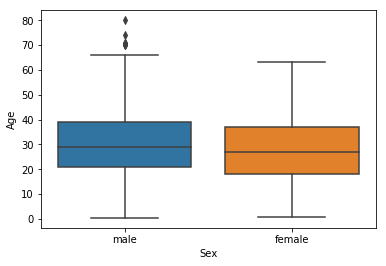

In [246]:
sns.boxplot(data = train, x = 'Sex', y = 'Age');

In [247]:
print(train[train['Sex'] == 'male'].mean()['Age'])
print(train[train['Sex'] == 'female'].mean()['Age'])

30.72664459161148
27.915708812260537


In [248]:
# There is less variation across sexes than there is across classes. 
# We will therefore use the mean age in the different Pclasses to impute the missing age data. 

In [249]:
# First class mean = 38
# Second class mean = 30
# Third class mean = 25

def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 30
        
        else:
            return 25
        
    else:
        return Age
        

In [250]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

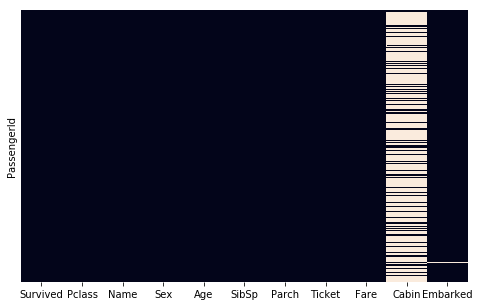

In [251]:
plt.figure(figsize=(8, 5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False);

In [252]:
# and now we drop the cabin column and the row in embarked that is missing

train.drop('Cabin', axis = 1, inplace=True)
train.dropna(inplace=True)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Feature Engineering**

In [253]:
train.info()

# So we have to convert the categorical features to dummy variables (Sex, Embarked). 
# We are going to drop ticket number because it does not appear to be useful.
# We are going to extract the title from the Name column and convert to dummy variables.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Name        889 non-null object
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Ticket      889 non-null object
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [254]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [255]:
# Splitting the name data by punctuation

NameSplit = train['Name'].str.split('[,.]')
NameSplit.head()

PassengerId
1                          [Braund,  Mr,  Owen Harris]
2    [Cumings,  Mrs,  John Bradley (Florence Briggs...
3                           [Heikkinen,  Miss,  Laina]
4     [Futrelle,  Mrs,  Jacques Heath (Lily May Peel)]
5                         [Allen,  Mr,  William Henry]
Name: Name, dtype: object

In [256]:
# We only need the second value from each of these lists (the title)

titles = pd.get_dummies([str.strip(name[1]) for name in NameSplit.values], drop_first=True)

In [257]:
feat = train.drop(['Sex','Embarked','Ticket','Name'],axis=1,inplace=False)

In [258]:
feat.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [259]:
final = pd.concat([feat,sex,embark,titles],axis=1)

In [260]:
final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Col,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [261]:
# Something is going on with the first row ?!? May be a problem from earlier in my code. 

final = final.drop(0)

In [263]:
final[final['Fare'].isnull()]

# WTF IS GOING ON HERE 

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Col,...,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [264]:
final.dropna(inplace=True)

In [265]:
# Now we have a DataFrame of numerical features which can be fed into our Logistic Regresion algorithm.

final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 1 to 888
Data columns (total 25 columns):
Survived        886 non-null float64
Pclass          886 non-null float64
Age             886 non-null float64
SibSp           886 non-null float64
Parch           886 non-null float64
Fare            886 non-null float64
male            886 non-null float64
Q               886 non-null float64
S               886 non-null float64
Col             886 non-null float64
Don             886 non-null float64
Dr              886 non-null float64
Jonkheer        886 non-null float64
Lady            886 non-null float64
Major           886 non-null float64
Master          886 non-null float64
Miss            886 non-null float64
Mlle            886 non-null float64
Mme             886 non-null float64
Mr              886 non-null float64
Mrs             886 non-null float64
Ms              886 non-null float64
Rev             886 non-null float64
Sir             886 non-null float64
the Cou

**Machine Learning **

Given that we are predicting Survival, which is binary, it makes sense to choose a Logistic Regression approach for our machine learning. 

In [202]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [266]:
X_train, X_test, y_train, y_test = train_test_split(final.drop('Survived',axis=1), 
                                                    final['Survived'], test_size=0.30, 
                                                    random_state=101)

In [267]:
# Training the model and making predictions

from sklearn.linear_model import LogisticRegression

In [268]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [269]:
predictions = logmodel.predict(X_test)

In [270]:
# Evaluating model

from sklearn.metrics import classification_report, confusion_matrix

In [271]:
print('Classification report: ', '\n', classification_report(y_test, predictions))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions))

Classification report:  
              precision    recall  f1-score   support

        0.0       0.82      0.87      0.85       166
        1.0       0.77      0.69      0.73       100

avg / total       0.80      0.80      0.80       266



Confusion matrix:  
 [[145  21]
 [ 31  69]]


In [136]:
# So this model is better at predicting death than survival.

# I actually think my model was better before I included the title information. 

In [272]:
final_new = final[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']].copy()

In [273]:
final_new.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
2,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
3,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
4,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
5,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [275]:
X_train, X_test, y_train, y_test = train_test_split(final_new.drop('Survived',axis=1), 
                                                    final_new['Survived'], test_size=0.30, 
                                                    random_state=101)

In [276]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [277]:
predictions_new = logmodel.predict(X_test)

In [279]:
print('Classification report: ', '\n', classification_report(y_test, predictions_new))
print('\n')
print('Confusion matrix: ', '\n', confusion_matrix(y_test, predictions_new))

Classification report:  
              precision    recall  f1-score   support

        0.0       0.83      0.88      0.86       166
        1.0       0.78      0.71      0.74       100

avg / total       0.81      0.82      0.81       266



Confusion matrix:  
 [[146  20]
 [ 29  71]]


In [ ]:
# So it looks like the titles overcomplicates things and detracts from the prediction.